<a href="https://colab.research.google.com/github/Gylla/Proyecto-Integrador/blob/master/Proyecto_Strava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos Públicos de Strava:
##Identificación de patrones colectivos en datos públicos de Strava mediante análisis estadístico y dashboards interactivos
**Objetivo General**
Identificar patrones colectivos en un conjunto de datos públicos de Strava mediante técnicas de análisis estadístico y presentarlos en dashboards interactivos reproducibles.

Mediante análisis estadístico y visualización interactiva, buscaremos comprender:

**Distribución de tipos de actividades**

Patrones temporales (horarios, días, estacionalidad)

Relaciones entre variables (distancia, velocidad, frecuencia cardíaca)

Segmentación de usuarios por comportamiento

## ⚙️Configuración Inicial (Entorno y Librerías)

In [120]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Configuración de visualización
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
%matplotlib inline

# Librerías para análisis estadístico
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## 📥Carga del Dataset


In [121]:
# Descarga del dataset desde GitHub
url = "https://raw.githubusercontent.com/Gylla/Proyecto-Integrador/refs/heads/master/Data/strava_data.csv"
try:
    df = pd.read_csv(url)
    print("Dataset cargado exitosamente")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")

# Mostrar las primeras filas para verificación
df.head(9)

Dataset cargado exitosamente


,start_date_local,type,name,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_heartrate,max_heartrate
0,2022-11-18T08:38:29Z,Walk,Morning Walk,3563.3,2122,99.0,1.679,5.622,100.8,130.0
1,2022-11-17T16:06:02Z,Ride,Evening Ride,30646.5,5742,130.0,5.337,12.612,121.1,166.0
2,2022-11-15T17:42:54Z,Ride,Evening Ride,34271.7,5653,118.0,6.063,10.222,121.5,167.0
3,2022-11-12T08:05:43Z,Ride,Morning Ride,181300.0,28762,808.0,6.303,14.963,149.3,179.0
4,2022-11-10T20:22:58Z,Walk,Evening Walk,4251.3,3305,70.0,1.286,2.009,88.0,141.0
5,2022-11-09T16:24:20Z,Ride,Evening Ride,22213.7,3718,136.0,5.975,13.664,149.3,178.0
6,2022-11-08T16:51:57Z,Ride,Evening Ride,26106.6,4875,191.0,5.355,11.898,129.6,177.0
7,2022-11-07T14:28:39Z,Ride,Afternoon Ride,6664.6,1250,71.0,5.332,14.294,149.0,178.0
8,2022-11-06T13:04:33Z,Ride,Afternoon Ride,50679.0,8435,278.0,6.008,12.335,127.8,174.0


#📊Fase 2: Comprensión de los Datos (Data Understanding)
**Objetivos:**

- Traducción de columnas y registros
- verificar datos porcentaje de datos faltantes.
- Identificar problemas de calidad de datos.
- Realizar análisis univariado y multivariado inicial.


## 🧭Fases CRISP-DM
CRISP-DM (Cross-Industry Standard Process for Data Mining) es una metodología estructurada en seis fases para organizar proyectos de análisis de datos de forma sistemática y reproducible: Que aplicaremos para guiar de forma ordenada el análisis de nuestras 544 actividades de Strava, cubriendo desde la definición de objetivos y preguntas clave, la exploración y limpieza de datos (unidades, nulos, outliers), el modelado estadístico y visualizaciones, hasta la validación de resultados y el despliegue de dashboards interactivos reproducibles con Python y Power BI o Looker Studio.

**🧠Fase 1: Comprensión del Negocio (Business Understanding)**

**Objetivos de Análisis:**

- Identificar patrones de comportamiento en usuarios de Strava mediante actividades deportivas.

- Segmentar los datos por características como tipo de actividad, intensidad y frecuencia.

- Generar insights accionables para recomendaciones personalizadas (entrenamiento, equipamiento).

**Preguntas Clave:**

- ¿Qué tipos de actividades son más frecuentes y cómo varían en distancia/duración?

- ¿Existen correlaciones entre velocidad promedio, elevación y frecuencia cardíaca?

- ¿Cómo se distribuyen temporalmente las actividades (horas/días/estacionalidad)?

# Renombrar las columnas, type y name a español

In [122]:
df.columns

Index(['start_date_local', 'type', 'name', 'distance', 'moving_time',
       'total_elevation_gain', 'average_speed', 'max_speed',
       'average_heartrate', 'max_heartrate'],
      dtype='object')

In [124]:
df.type.unique()

array(['Walk', 'Ride', 'Hike', 'Run', 'Swim', 'Surfing', 'Kayaking',
       'StandUpPaddling', 'EBikeRide', 'Snowboard', 'WeightTraining',
       'Workout'], dtype=object)

In [125]:
df.name.unique()

array(['Morning Walk', 'Evening Ride', 'Morning Ride', 'Evening Walk',
       'Afternoon Ride', 'Afternoon Hike', 'Afternoon Run',
       'Afternoon Walk', 'Afternoon Swim', 'Evening Run', 'Morning Run',
       'Afternoon Surfing', 'Evening Kayaking', 'Morning Hike',
       'Evening Hike', 'Afternoon Kayaking', 'Night Ride',
       'Evening StandUpPaddling', 'Afternoon EBikeRide',
       'Morning Snowboard', 'Evening WeightTraining',
       'Afternoon Snowboard', 'Morning Surfing', 'Night Walk',
       'Afternoon Workout', 'Morning Kayaking', 'Night Run',
       'Afternoon WeightTraining', 'Morning Workout', 'Evening Workout'],
      dtype=object)

In [126]:
def traducir_dataset(df):
    # Diccionario de traducción de valores
    mapeo_tipos = {
        "Walk": "Caminata",
        "Ride": "Ciclismo",
        "Hike": "Senderismo",
        "Run": "Carrera",
        "Swim": "Natación",
        "Surfing": "Surf",
        "Kayaking": "Kayak",
        "StandUpPaddling": "Paddle surf",
        "EBikeRide": "Ciclismo eléctrico",
        "Snowboard": "Snowboard",
        "WeightTraining": "Entrenamiento de fuerza",
        "Workout": "Entrenamiento general"
    }

    mapeo_nombres = {
        "Morning Walk": "Caminata (mañana)",
        "Evening Ride": "Ciclismo (tarde-noche)",
        "Morning Ride": "Ciclismo (mañana)",
        "Evening Walk": "Caminata (tarde-noche)",
        "Afternoon Ride": "Ciclismo (tarde)",
        "Afternoon Hike": "Senderismo (tarde)",
        "Afternoon Run": "Trote/Carrera (tarde)",
        "Afternoon Walk": "Caminata (tarde)",
        "Afternoon Swim": "Natación (tarde)",
        "Evening Run": "Trote/Carrera (tarde-noche)",
        "Morning Run": "Trote/Carrera (mañana)",
        "Afternoon Surfing": "Surf (tarde)",
        "Evening Kayaking": "Kayak (tarde-noche)",
        "Morning Hike": "Senderismo (mañana)",
        "Evening Hike": "Senderismo (tarde-noche)",
        "Afternoon Kayaking": "Kayak (tarde)",
        "Night Ride": "Ciclismo (noche)",
        "Evening StandUpPaddling": "Paddle Surf (tarde-noche)",
        "Afternoon EBikeRide": "E-Bike (tarde)",
        "Morning Snowboard": "Snowboard (mañana)",
        "Evening WeightTraining": "Pesas (tarde-noche)",
        "Afternoon Snowboard": "Snowboard (tarde)",
        "Morning Surfing": "Surf (mañana)",
        "Night Walk": "Caminata (noche)",
        "Afternoon Workout": "Entrenamiento (tarde)",
        "Morning Kayaking": "Kayak (mañana)",
        "Night Run": "Trote/Carrera (noche)",
        "Afternoon WeightTraining": "Pesas (tarde)",
        "Morning Workout": "Entrenamiento (mañana)",
        "Evening Workout": "Entrenamiento (tarde-noche)"
    }

    # Diccionario de renombrado de columnas
    mapeo_columnas = {
        'start_date_local': 'Fecha_de_Inicio',
        'type': 'Tipo_de_Actividad',
        'name': 'Nombre_de_la_Sesión',
        'distance': 'Distancia(m)',
        'moving_time': 'Tiempo_en_Movimiento(s)',
        'total_elevation_gain': 'Ganancia_de_Elevación(m)',
        'average_speed': 'Velocidad_Promedio(m/s)',
        'max_speed': 'Velocidad_Máxima(m/s)',
        'average_heartrate': 'Frecuencia_Cardíaca_Promedio(bpm)',
        'max_heartrate': 'Frecuencia_Cardíaca_Máxima(bpm)'
    }

    # Traducción de valores
    if "type" in df.columns:
        df["type"] = df["type"].map(mapeo_tipos).fillna(df["type"])
    if "name" in df.columns:
        df["name"] = df["name"].map(mapeo_nombres).fillna(df["name"])

    # Renombrar columnas
    df = df.rename(columns=mapeo_columnas)
    return df
#---------------------------------------------------------
#llamar la función
df = traducir_dataset(df)
df.head(5)

,Fecha_de_Inicio,Tipo_de_Actividad,Nombre_de_la_Sesión,Distancia(m),Tiempo_en_Movimiento(s),Ganancia_de_Elevación(m),Velocidad_Promedio(m/s),Velocidad_Máxima(m/s),Frecuencia_Cardíaca_Promedio(bpm),Frecuencia_Cardíaca_Máxima(bpm)
0,2022-11-18T08:38:29Z,Caminata,Caminata (mañana),3563.3,2122,99.0,1.679,5.622,100.8,130.0
1,2022-11-17T16:06:02Z,Ciclismo,Ciclismo (tarde-noche),30646.5,5742,130.0,5.337,12.612,121.1,166.0
2,2022-11-15T17:42:54Z,Ciclismo,Ciclismo (tarde-noche),34271.7,5653,118.0,6.063,10.222,121.5,167.0
3,2022-11-12T08:05:43Z,Ciclismo,Ciclismo (mañana),181300.0,28762,808.0,6.303,14.963,149.3,179.0
4,2022-11-10T20:22:58Z,Caminata,Caminata (tarde-noche),4251.3,3305,70.0,1.286,2.009,88.0,141.0


In [127]:
df.columns

Index(['Fecha_de_Inicio', 'Tipo_de_Actividad', 'Nombre_de_la_Sesión',
       'Distancia(m)', 'Tiempo_en_Movimiento(s)', 'Ganancia_de_Elevación(m)',
       'Velocidad_Promedio(m/s)', 'Velocidad_Máxima(m/s)',
       'Frecuencia_Cardíaca_Promedio(bpm)', 'Frecuencia_Cardíaca_Máxima(bpm)'],
      dtype='object')

## Exploración Inicial con Análisis Descriptivo Básico
Revisión general del tamaño del dataset, tipos de variables y primeros registros. Se debe reflejar la justificación del proyecto.
- Distribución de tipos de actividades
- Información general del dataset
- Explorar las diferentes columnas y conocer los elementos únicos.

In [128]:
# 1. Total de registros
total_registros = df.shape[0]
print(f"Total de registros: {total_registros}")

# 2. Tipos de actividades y su distribución porcentual
actividades = df['Tipo_de_Actividad'].value_counts(normalize=True) * 100
print("\nDistribución de tipos de actividades:")
print(actividades.round(1))

# 3. Información general del dataset
print("\nInformación general del dataset:")
df.info()

# 4. Estadísticas descriptivas de variables numéricas
print("\nEstadísticas descriptivas:")
df.describe().round(2)

Total de registros: 544

Distribución de tipos de actividades:
Tipo_de_Actividad
Ciclismo                   54.6
Caminata                   21.3
Senderismo                 12.3
Carrera                     5.7
Snowboard                   1.5
Entrenamiento de fuerza     1.1
Entrenamiento general       1.1
Kayak                       0.9
Ciclismo eléctrico          0.6
Natación                    0.4
Surf                        0.4
Paddle surf                 0.2
Name: proportion, dtype: float64

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Fecha_de_Inicio                    544 non-null    object 
 1   Tipo_de_Actividad                  544 non-null    object 
 2   Nombre_de_la_Sesión                544 non-null    object 
 3   Distancia(m)                       544

,Distancia(m),Tiempo_en_Movimiento(s),Ganancia_de_Elevación(m),Velocidad_Promedio(m/s),Velocidad_Máxima(m/s),Frecuencia_Cardíaca_Promedio(bpm),Frecuencia_Cardíaca_Máxima(bpm)
count,544.00,544.00,544.00,544.00,544.00,489.00,489.00
mean,31685.06,7537.73,200.44,3.76,9.19,115.68,154.65
std,37478.98,6987.78,256.08,2.22,5.46,24.37,29.35
min,0.00,176.00,0.00,0.00,0.00,59.20,68.00
25%,5699.60,3238.25,40.00,1.35,3.42,95.40,130.00
50%,20441.65,5776.00,133.00,4.43,10.60,115.90,162.00
75%,43762.20,8927.50,254.25,5.59,13.60,134.60,179.00
max,240426.00,44280.00,1905.00,11.36,31.30,175.60,245.00


In [129]:
# Análisis de valores únicos por columna
print("\n" + "="*60)
print("ANÁLISIS DE VALORES ÚNICOS POR COLUMNA".center(60))
print("="*60 + "\n")

for i, columna in enumerate(df.columns, 1):
    # Obtener valores únicos
    valores_unicos = df[columna].unique()
    num_unicos = len(valores_unicos)

    # Mostrar información de la columna
    print(f"\nCOLUMNA {i}: {columna}".ljust(50) + f"({num_unicos} valores únicos)")
    print("-"*60)

    # Mostrar valores únicos (con formato para listas largas)
    if num_unicos <= 10:
        print(valores_unicos)
    else:
        print(f"Primeros 5 valores: {valores_unicos[:5]}")
        print(f"Últimos 5 valores: {valores_unicos[-5:]}")
        print(f"\nMuestra de valores intermedios: {valores_unicos[5:10]}" if num_unicos > 10 else "")

    # Estadísticas adicionales
    print(f"\nTipo de dato: {df[columna].dtype}")
    if pd.api.types.is_numeric_dtype(df[columna]):
        print(f"Rango: {df[columna].min()} - {df[columna].max()}")

    print("="*60)

print("\n" + "ANÁLISIS COMPLETADO".center(60, "~") + "\n")


           ANÁLISIS DE VALORES ÚNICOS POR COLUMNA           


COLUMNA 1: Fecha_de_Inicio                       (471 valores únicos)
------------------------------------------------------------
Primeros 5 valores: ['2022-11-18T08:38:29Z' '2022-11-17T16:06:02Z' '2022-11-15T17:42:54Z'
 '2022-11-12T08:05:43Z' '2022-11-10T20:22:58Z']
Últimos 5 valores: ['2020-08-22T17:11:57Z' '2020-08-16T09:24:57Z' '2020-08-08T11:33:49Z'
 '2020-08-06T19:09:25Z' '2020-04-13T11:42:10Z']

Muestra de valores intermedios: ['2022-11-09T16:24:20Z' '2022-11-08T16:51:57Z' '2022-11-07T14:28:39Z'
 '2022-11-06T13:04:33Z' '2022-11-05T10:43:44Z']

Tipo de dato: object

COLUMNA 2: Tipo_de_Actividad                     (12 valores únicos)
------------------------------------------------------------
Primeros 5 valores: ['Caminata' 'Ciclismo' 'Senderismo' 'Carrera' 'Natación']
Últimos 5 valores: ['Paddle surf' 'Ciclismo eléctrico' 'Snowboard' 'Entrenamiento de fuerza'
 'Entrenamiento general']

Muestra de valores intermedi

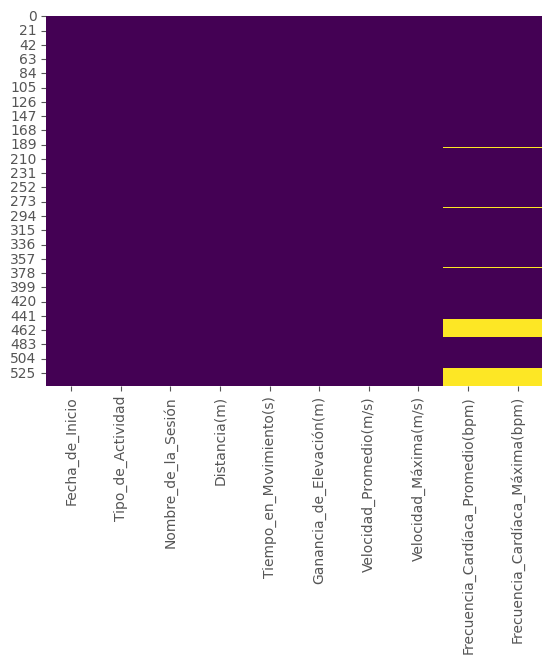

In [130]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

Se registran que en las columnas  Frecuencia_Cardíaca_Promedio(bpm) y Frecuencia_Cardíaca_Máxima(bpm) tienen un porcentaje de perdida de 10.11% ambos.

la siguientes es la tabla que indica los porcentajes de datos faltantes. Solo con las dos columnas antes mencionadas

In [131]:
# Crear una lista de tuplas con los resultados
results = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    results.append((col, round(pct_missing, 2)))

# Convertir a DataFrame para mejor formato
results_df = pd.DataFrame(results, columns=['Columna', '% Faltante'])

# Imprimir como tabla Markdown
print(results_df.to_markdown(index=False, tablefmt="github", stralign="left", numalign="right"))

| Columna                           |   % Faltante |
|-----------------------------------|--------------|
| Fecha_de_Inicio                   |            0 |
| Tipo_de_Actividad                 |            0 |
| Nombre_de_la_Sesión               |            0 |
| Distancia(m)                      |            0 |
| Tiempo_en_Movimiento(s)           |            0 |
| Ganancia_de_Elevación(m)          |            0 |
| Velocidad_Promedio(m/s)           |            0 |
| Velocidad_Máxima(m/s)             |            0 |
| Frecuencia_Cardíaca_Promedio(bpm) |        10.11 |
| Frecuencia_Cardíaca_Máxima(bpm)   |        10.11 |


In [132]:
df['Frecuencia_Cardíaca_Promedio(bpm)']=df['Frecuencia_Cardíaca_Promedio(bpm)'].interpolate(method='linear')
df['Frecuencia_Cardíaca_Máxima(bpm)']=df['Frecuencia_Cardíaca_Máxima(bpm)'].interpolate(method='linear')


Se aplica el método de interpolación linear para rellenar las columnas de datos faltantes

El método de interpolación en el rellenado de datos estima valores desconocidos a partir de datos conocidos, asumiendo una tendencia o patrón entre ellos.

Funcionamiento básico:

Usa puntos de datos cercanos para predecir el valor faltante.

Métodos comunes: lineal (usa una recta entre dos puntos), polinómica (ajusta un polinomio) o vecinos más cercanos.

In [135]:
filas_con_nan = df[df.isna().any(axis=1)]
filas_con_nan.shape

(0, 10)

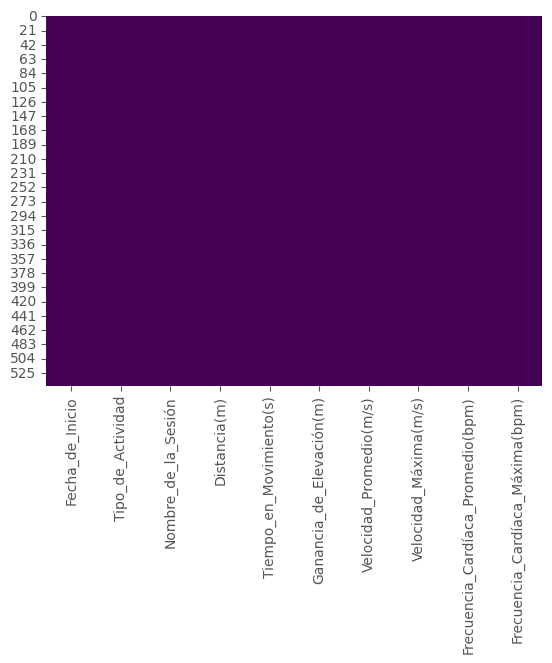

In [134]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

In [136]:
df['Tipo_de_Actividad'].unique()

array(['Caminata', 'Ciclismo', 'Senderismo', 'Carrera', 'Natación',
       'Surf', 'Kayak', 'Paddle surf', 'Ciclismo eléctrico', 'Snowboard',
       'Entrenamiento de fuerza', 'Entrenamiento general'], dtype=object)

In [137]:
df.head()

,Fecha_de_Inicio,Tipo_de_Actividad,Nombre_de_la_Sesión,Distancia(m),Tiempo_en_Movimiento(s),Ganancia_de_Elevación(m),Velocidad_Promedio(m/s),Velocidad_Máxima(m/s),Frecuencia_Cardíaca_Promedio(bpm),Frecuencia_Cardíaca_Máxima(bpm)
0,2022-11-18T08:38:29Z,Caminata,Caminata (mañana),3563.3,2122,99.0,1.679,5.622,100.8,130.0
1,2022-11-17T16:06:02Z,Ciclismo,Ciclismo (tarde-noche),30646.5,5742,130.0,5.337,12.612,121.1,166.0
2,2022-11-15T17:42:54Z,Ciclismo,Ciclismo (tarde-noche),34271.7,5653,118.0,6.063,10.222,121.5,167.0
3,2022-11-12T08:05:43Z,Ciclismo,Ciclismo (mañana),181300.0,28762,808.0,6.303,14.963,149.3,179.0
4,2022-11-10T20:22:58Z,Caminata,Caminata (tarde-noche),4251.3,3305,70.0,1.286,2.009,88.0,141.0


# Conversión de fechas a formato datetime

Se crean nuevas colimnas a partir de la columna inicial "Fecha_de_Inicio" para tener datos mas especificos como: Fecha, Hora, Dia de la semana y mes

In [138]:
df['Fecha_de_Inicio'] = pd.to_datetime(df['Fecha_de_Inicio'])
df['Fecha'] = df['Fecha_de_Inicio'].dt.date
df['Hora'] = df['Fecha_de_Inicio'].dt.hour
df['Dia_de_semana'] = df['Fecha_de_Inicio'].dt.day_name()
df['Mes'] = df['Fecha_de_Inicio'].dt.month_name()

In [139]:
df.head()

,Fecha_de_Inicio,Tipo_de_Actividad,Nombre_de_la_Sesión,Distancia(m),Tiempo_en_Movimiento(s),Ganancia_de_Elevación(m),Velocidad_Promedio(m/s),Velocidad_Máxima(m/s),Frecuencia_Cardíaca_Promedio(bpm),Frecuencia_Cardíaca_Máxima(bpm),Fecha,Hora,Dia_de_semana,Mes
0,2022-11-18 08:38:29+00:00,Caminata,Caminata (mañana),3563.3,2122,99.0,1.679,5.622,100.8,130.0,2022-11-18,8,Friday,November
1,2022-11-17 16:06:02+00:00,Ciclismo,Ciclismo (tarde-noche),30646.5,5742,130.0,5.337,12.612,121.1,166.0,2022-11-17,16,Thursday,November
2,2022-11-15 17:42:54+00:00,Ciclismo,Ciclismo (tarde-noche),34271.7,5653,118.0,6.063,10.222,121.5,167.0,2022-11-15,17,Tuesday,November
3,2022-11-12 08:05:43+00:00,Ciclismo,Ciclismo (mañana),181300.0,28762,808.0,6.303,14.963,149.3,179.0,2022-11-12,8,Saturday,November
4,2022-11-10 20:22:58+00:00,Caminata,Caminata (tarde-noche),4251.3,3305,70.0,1.286,2.009,88.0,141.0,2022-11-10,20,Thursday,November


# Graficos de comparación

<Axes: xlabel='Tipo_de_Actividad', ylabel='count'>

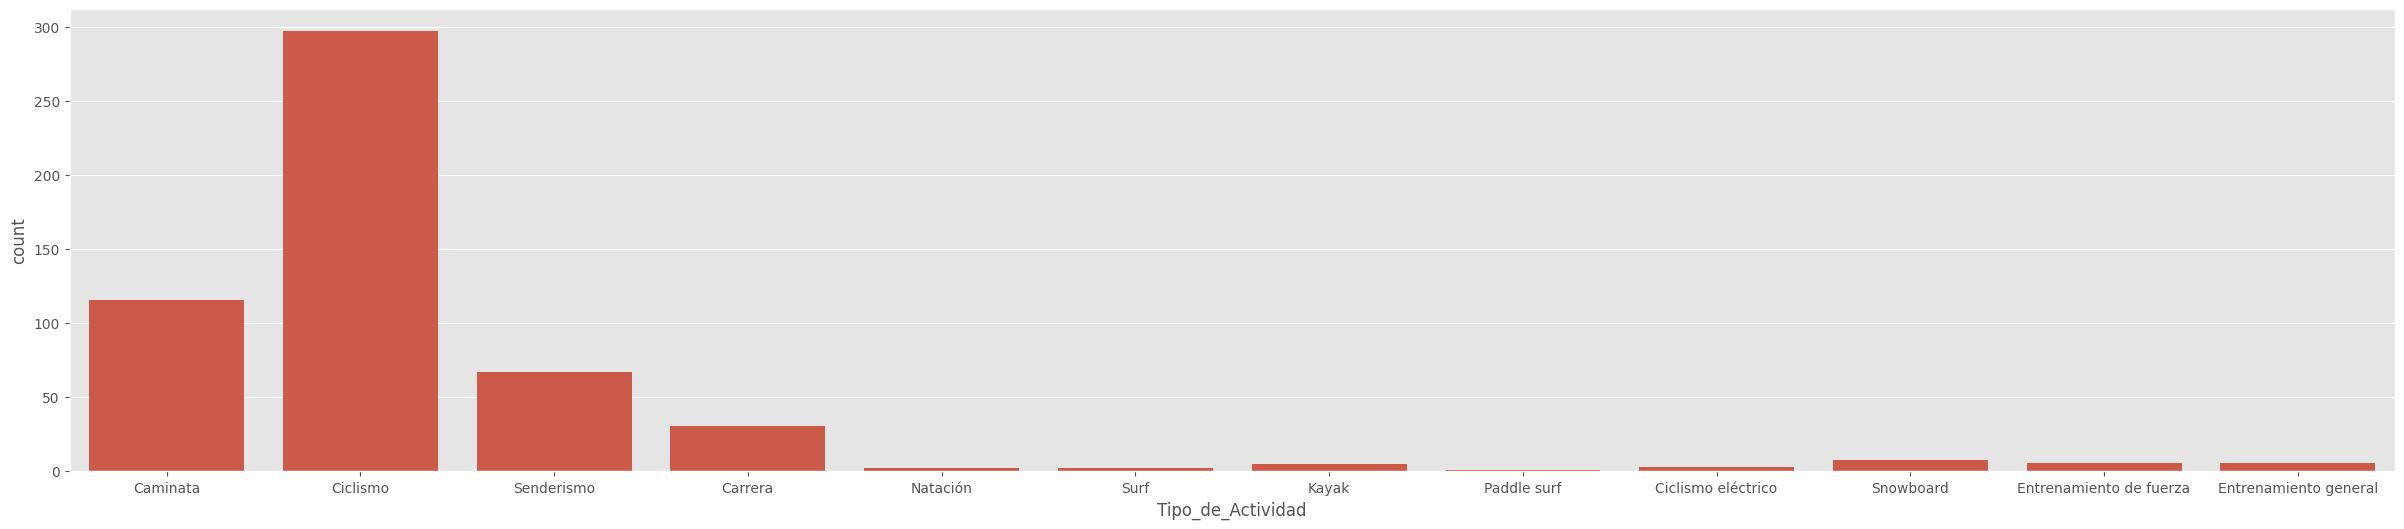

In [97]:
plt.figure(figsize=(30, 6))
sns.countplot(data= df, x='Tipo_de_Actividad')

**Lo que se observa:**
Ciclismo es, por mucho, la actividad más frecuente, con casi 300 registros.

- Caminata y Senderismo también son comunes, pero en menor medida (alrededor de 120 y 70 registros respectivamente).

- Actividades como Carrera tienen una presencia moderada (~30).

- Las demás (como Natación, Surf, Kayak, Paddle surf, Ciclismo eléctrico, etc.) son poco frecuentes, con menos de 10 registros cada una.

-Entrenamiento de fuerza y Entrenamiento general, posiblemente referidas a rutinas de gimnasio, también con baja frecuencia.

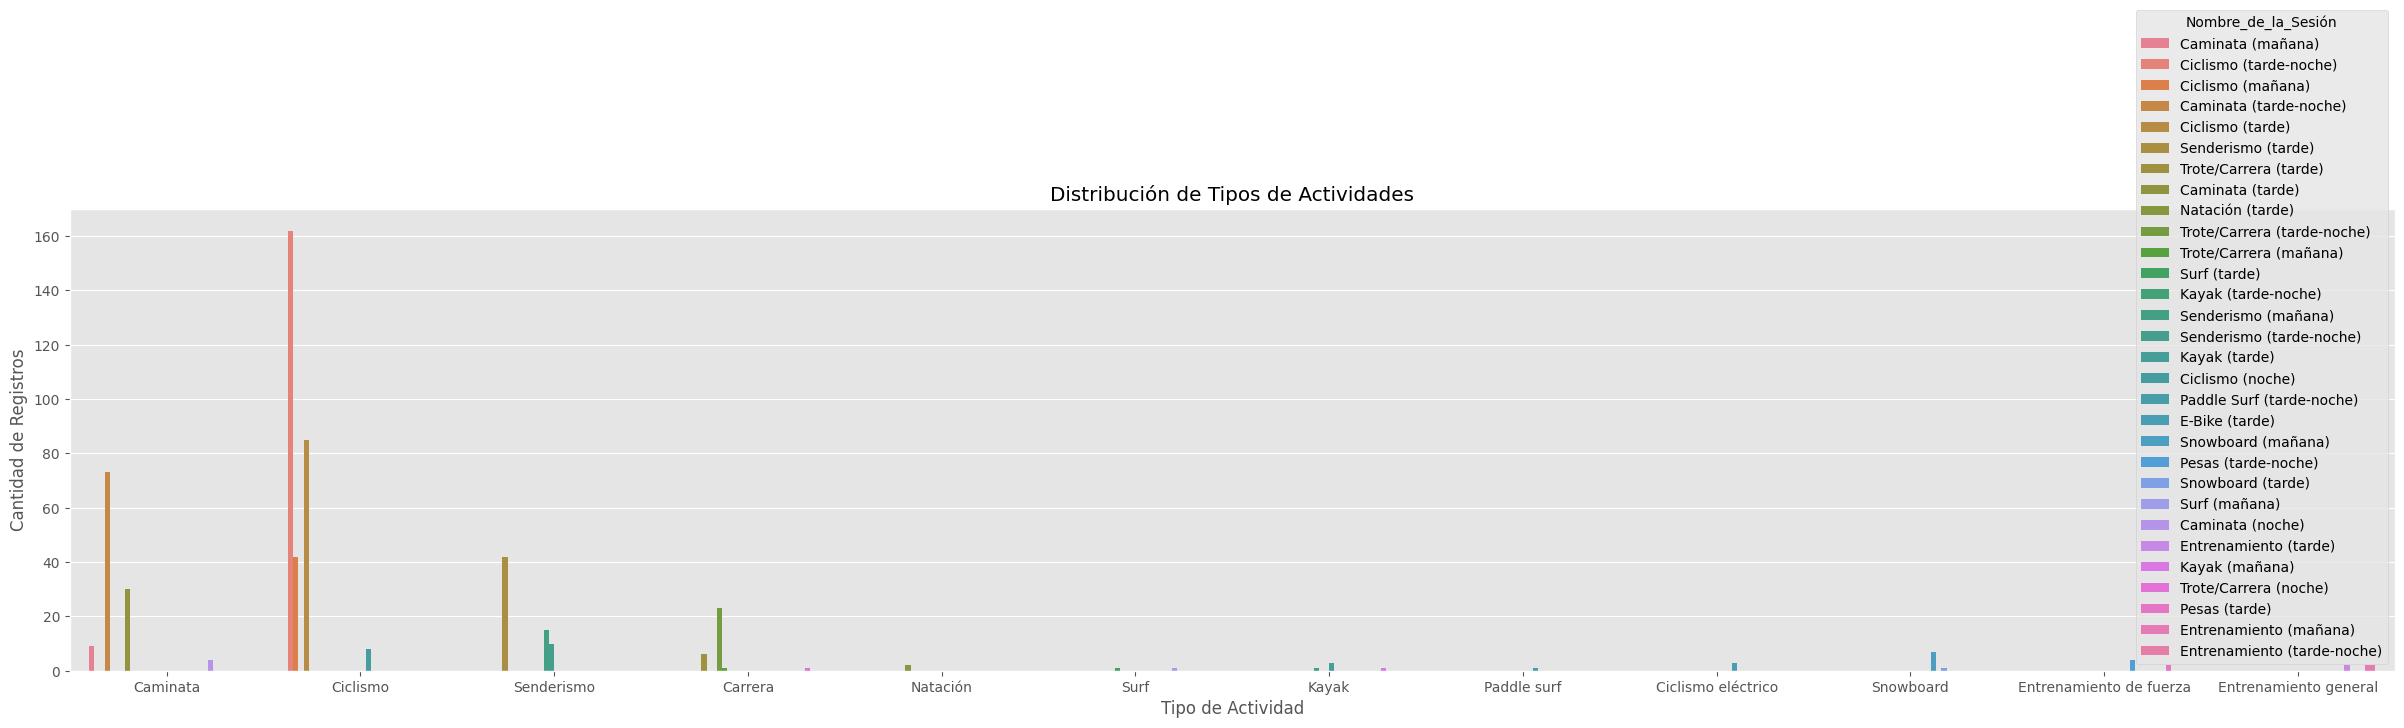

In [96]:
plt.figure(figsize=(30, 6))
sns.countplot(data= df, x='Tipo_de_Actividad', hue='Nombre_de_la_Sesión')
plt.title('Distribución de Tipos de Actividades')
plt.ylabel('Cantidad de Registros')
plt.xlabel('Tipo de Actividad')
plt.show()

**Observaciones clave:**

- Ciclismo domina claramente, especialmente en la categoría Ciclismo (mañana) y Ciclismo (tarde).

- Caminata y Senderismo tienen también variaciones horarias importantes, aunque menos numerosas.

- Hay actividades como Natación, Surf, Kayak, y Pesas que aparecen en momentos muy puntuales del día, con baja frecuencia.

- Se nota un nivel interesante de detalle en la segmentación temporal (mañana, tarde, tarde-noche, etc.).

**Conclusión:**

Este gráfico añade una capa de análisis temporal a las actividades físicas, lo cual es útil para identificar hábitos o preferencias horarias en los entrenamientos.